In [10]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sqlite3
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from statsmodels.tsa.arima.model import ARIMA
pd.options.display.max_columns = 999
from scrapy import Selector
import requests
import os


In [11]:
# Load the dataset
file_path = r"D:\Amul Data engineering\data\Data_Engineering_dataset.csv"
df = pd.read_csv(file_path)

In [12]:
# Create unique Drivers table with IDs
Drivers_df = pd.DataFrame(df["Drivers"].unique(), columns=["Drivers"])
Drivers_df["Drivers_ID"] = range(1, len(Drivers_df) + 1)

# Create unique Year table with IDs
Year_df = pd.DataFrame(df["Year"].unique(), columns=["Year"])
Year_df["Year_ID"] = range(1, len(Year_df) + 1)

# Merge to get Drivers_ID and Year_ID in the main table
df = df.merge(Drivers_df, on="Drivers", how="left", suffixes=("", "_dup"))
df = df.merge(Year_df, left_on="Year", right_on="Year", how="left", suffixes=("", "_dup"))

# Drop duplicate or redundant columns
df_main = df.drop(columns=["Drivers", "Year"])


In [13]:
# Save as three separate database files
Drivers_db_path = r"D:\Amul Data engineering\data\Drivers.csv"
Year_db_path = r"D:\Amul Data engineering\data\Year.csv"
main_db_path = r"D:\Amul Data engineering\data\main.csv"

Drivers_df.to_csv(Drivers_db_path, index=False)
Year_df.to_csv(Year_db_path, index=False)
df_main.to_csv(main_db_path, index=False)

(Drivers_db_path, Year_db_path, main_db_path)

('D:\\Amul Data engineering\\data\\Drivers.csv',
 'D:\\Amul Data engineering\\data\\Year.csv',
 'D:\\Amul Data engineering\\data\\main.csv')

In [14]:

# Define database file path
db_file_path = r"D:\Amul Data engineering\data\Data_Engineering_dataset.db"

# Create SQLite database and save tables
conn = sqlite3.connect(db_file_path)

# Save DataFrames as tables in SQLite
Drivers_df.to_sql("Drivers", conn, index=False, if_exists="replace")
Year_df.to_sql("Year", conn, index=False, if_exists="replace")
df_main.to_sql("main", conn, index=False, if_exists="replace")

543

In [15]:
#pip install sqlite3

In [16]:
# Close connection
conn.close()



In [17]:
# Reconnect to the SQLite database
conn = sqlite3.connect(db_file_path)

In [18]:
# Load data into DataFrames
df_main = pd.read_sql("SELECT * FROM main", conn)
df_Drivers = pd.read_sql("SELECT * FROM Drivers", conn)
df_Year = pd.read_sql("SELECT * FROM Year", conn)

In [19]:
# Merge tables for meaningful analysis
df_main = df_main.merge(df_Drivers, on="Drivers_ID", how="left")
df_main = df_main.merge(df_Year, on="Year_ID", how="left")


In [20]:

# Close connection
conn.close()

In [21]:
df.Drivers.T

0      M. VERSTAPPEN
1         C. LECLERC
2           S. PEREZ
3         G. RUSSELL
4           C. SAINZ
           ...      
538          G. ZHOU
539         A. ALBON
540        N. LATIFI
541      N. de VRIES
542    N. HULKENBERG
Name: Drivers, Length: 543, dtype: object

In [22]:
df_Year.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Year,2022,2023,2024,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23


In [23]:
df_main

,Drivers_ID,Australia,Styria,Malaysia,China,Turkey,Bahrain,Spain,Monaco,Canada,Europe,France,Azerbaijan,Austria,Britain,Silverstone,Germany,Hungary,Belgium,Italy,Netherlands,Tuscany,Singapore,Japan,Russia,Eifel,Portugal,Emilia_Romagna,Sakhir,South_Korea,India,Abu_Dhabi,Qatar,Saudi_Arabia,USA,Brazil,Las_Vagas,Miami,Mexico,Total Points,Drivers_ID_dup,Year_ID,Drivers,Year
0,66,0,0,0,0,0,0,25,15.0,25,0,25,25,27,6.0,0,0,25.0,26.0,25,26,0,6,25,0,0,0,34,0,0,0.0,25,0,25,25,13,0,26,25,454,1,1,T. MONTEIRO,2022
1,13,26,0,0,0,0,26,0,12.0,10,0,0,0,32,12.0,0,0,8.0,8.0,18,15,0,18,15,0,0,0,15,0,0,0.0,18,0,19,15,15,0,18,8,308,2,1,K. MAGNUSSEN,2022
2,96,18,0,0,0,0,0,19,25.0,0,0,12,19,4,18.0,0,0,10.0,18.0,9,10,0,25,18,0,0,0,24,0,0,0.0,15,0,12,12,10,0,12,15,305,3,1,J. BIANCHI,2022
3,29,15,0,0,0,0,12,15,10.0,12,0,15,15,17,0.0,0,0,15.0,12.0,15,18,0,0,4,0,0,0,12,0,0,0.0,10,0,10,11,34,0,10,13,275,4,1,M. HAKKINEN,2022
4,15,0,0,0,0,0,18,12,18.0,19,0,11,0,6,25.0,0,0,12.0,15.0,12,4,0,15,0,0,0,0,5,0,0,0.0,12,0,15,0,22,0,15,10,246,5,1,L. STROLL,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,31,0,0,0,0,0,1,0,0.0,4,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6,18,1,R. BARRICHELLO,2022
539,1,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2,0,4,19,1,M. VERSTAPPEN,2022
540,72,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,2,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,20,1,R. KUBICA,2022
541,68,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,21,1,C. ALBERS,2022


In [24]:
df_main=df_main.drop(columns=["Drivers_ID_dup", "Year_ID","Drivers_ID"])
df_main

,Australia,Styria,Malaysia,China,Turkey,Bahrain,Spain,Monaco,Canada,Europe,France,Azerbaijan,Austria,Britain,Silverstone,Germany,Hungary,Belgium,Italy,Netherlands,Tuscany,Singapore,Japan,Russia,Eifel,Portugal,Emilia_Romagna,Sakhir,South_Korea,India,Abu_Dhabi,Qatar,Saudi_Arabia,USA,Brazil,Las_Vagas,Miami,Mexico,Total Points,Drivers,Year
0,0,0,0,0,0,0,25,15.0,25,0,25,25,27,6.0,0,0,25.0,26.0,25,26,0,6,25,0,0,0,34,0,0,0.0,25,0,25,25,13,0,26,25,454,T. MONTEIRO,2022
1,26,0,0,0,0,26,0,12.0,10,0,0,0,32,12.0,0,0,8.0,8.0,18,15,0,18,15,0,0,0,15,0,0,0.0,18,0,19,15,15,0,18,8,308,K. MAGNUSSEN,2022
2,18,0,0,0,0,0,19,25.0,0,0,12,19,4,18.0,0,0,10.0,18.0,9,10,0,25,18,0,0,0,24,0,0,0.0,15,0,12,12,10,0,12,15,305,J. BIANCHI,2022
3,15,0,0,0,0,12,15,10.0,12,0,15,15,17,0.0,0,0,15.0,12.0,15,18,0,0,4,0,0,0,12,0,0,0.0,10,0,10,11,34,0,10,13,275,M. HAKKINEN,2022
4,0,0,0,0,0,18,12,18.0,19,0,11,0,6,25.0,0,0,12.0,15.0,12,4,0,15,0,0,0,0,5,0,0,0.0,12,0,15,0,22,0,15,10,246,L. STROLL,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0,0,0,0,0,1,0,0.0,4,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6,R. BARRICHELLO,2022
539,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2,0,4,M. VERSTAPPEN,2022
540,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,2,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,R. KUBICA,2022
541,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,C. ALBERS,2022


In [25]:
df.head()

,Drivers,Drivers_ID,Year,Australia,Styria,Malaysia,China,Turkey,Bahrain,Spain,Monaco,Canada,Europe,France,Azerbaijan,Austria,Britain,Silverstone,Germany,Hungary,Belgium,Italy,Netherlands,Tuscany,Singapore,Japan,Russia,Eifel,Portugal,Emilia_Romagna,Sakhir,South_Korea,India,Abu_Dhabi,Qatar,Saudi_Arabia,USA,Brazil,Las_Vagas,Miami,Mexico,Total Points,Drivers_ID_dup,Year_ID
0,M. VERSTAPPEN,66,2022,0,0,0,0,0,0,25,15.0,25,0,25,25,27,6.0,0,0,25.0,26.0,25,26,0,6,25,0,0,0,34,0,0,0.0,25,0,25,25,13,0,26,25,454,1,1
1,C. LECLERC,13,2022,26,0,0,0,0,26,0,12.0,10,0,0,0,32,12.0,0,0,8.0,8.0,18,15,0,18,15,0,0,0,15,0,0,0.0,18,0,19,15,15,0,18,8,308,2,1
2,S. PEREZ,96,2022,18,0,0,0,0,0,19,25.0,0,0,12,19,4,18.0,0,0,10.0,18.0,9,10,0,25,18,0,0,0,24,0,0,0.0,15,0,12,12,10,0,12,15,305,3,1
3,G. RUSSELL,29,2022,15,0,0,0,0,12,15,10.0,12,0,15,15,17,0.0,0,0,15.0,12.0,15,18,0,0,4,0,0,0,12,0,0,0.0,10,0,10,11,34,0,10,13,275,4,1
4,C. SAINZ,15,2022,0,0,0,0,0,18,12,18.0,19,0,11,0,6,25.0,0,0,12.0,15.0,12,4,0,15,0,0,0,0,5,0,0,0.0,12,0,15,0,22,0,15,10,246,5,1


In [26]:
df_main.tail()

,Australia,Styria,Malaysia,China,Turkey,Bahrain,Spain,Monaco,Canada,Europe,France,Azerbaijan,Austria,Britain,Silverstone,Germany,Hungary,Belgium,Italy,Netherlands,Tuscany,Singapore,Japan,Russia,Eifel,Portugal,Emilia_Romagna,Sakhir,South_Korea,India,Abu_Dhabi,Qatar,Saudi_Arabia,USA,Brazil,Las_Vagas,Miami,Mexico,Total Points,Drivers,Year
538,0,0,0,0,0,1,0,0.0,4,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6,R. BARRICHELLO,2022
539,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2,0,4,M. VERSTAPPEN,2022
540,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,2,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,R. KUBICA,2022
541,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,C. ALBERS,2022
542,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,V. LIUZZI,2022


Checking Duplicate Rows

In [27]:
df_main.shape

(543, 41)

In [28]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Australia       543 non-null    int64  
 1   Styria          543 non-null    int64  
 2   Malaysia        543 non-null    int64  
 3   China           543 non-null    int64  
 4   Turkey          543 non-null    int64  
 5   Bahrain         543 non-null    int64  
 6   Spain           543 non-null    int64  
 7   Monaco          543 non-null    float64
 8   Canada          543 non-null    int64  
 9   Europe          543 non-null    int64  
 10  France          543 non-null    int64  
 11  Azerbaijan      543 non-null    int64  
 12  Austria         543 non-null    int64  
 13  Britain         542 non-null    float64
 14  Silverstone     543 non-null    int64  
 15  Germany         543 non-null    int64  
 16  Hungary         542 non-null    float64
 17  Belgium         543 non-null    flo

In [29]:
df_main.dtypes

Australia           int64
Styria              int64
Malaysia            int64
China               int64
Turkey              int64
Bahrain             int64
Spain               int64
Monaco            float64
Canada              int64
Europe              int64
France              int64
Azerbaijan          int64
Austria             int64
Britain           float64
Silverstone         int64
Germany             int64
Hungary           float64
Belgium           float64
Italy               int64
Netherlands         int64
Tuscany             int64
Singapore           int64
Japan               int64
Russia              int64
Eifel               int64
Portugal            int64
Emilia_Romagna      int64
Sakhir              int64
South_Korea         int64
India             float64
Abu_Dhabi           int64
Qatar               int64
Saudi_Arabia        int64
USA                 int64
Brazil              int64
Las_Vagas           int64
Miami               int64
Mexico              int64
Total Points

In [30]:
print(df_main.isnull().sum()) 

Australia         0
Styria            0
Malaysia          0
China             0
Turkey            0
Bahrain           0
Spain             0
Monaco            0
Canada            0
Europe            0
France            0
Azerbaijan        0
Austria           0
Britain           1
Silverstone       0
Germany           0
Hungary           1
Belgium           0
Italy             0
Netherlands       0
Tuscany           0
Singapore         0
Japan             0
Russia            0
Eifel             0
Portugal          0
Emilia_Romagna    0
Sakhir            0
South_Korea       0
India             1
Abu_Dhabi         0
Qatar             0
Saudi_Arabia      0
USA               0
Brazil            0
Las_Vagas         0
Miami             0
Mexico            0
Total Points      0
Drivers           1
Year              0
dtype: int64


In [31]:
print(f"Duplicate rows: {df_main.duplicated().sum()}")

Duplicate rows: 22


In [32]:
df_main.drop_duplicates(inplace=True)

In [33]:
df_main.shape

(521, 41)

Summary Statistics

In [34]:
df_main.describe()

,Australia,Styria,Malaysia,China,Turkey,Bahrain,Spain,Monaco,Canada,Europe,France,Azerbaijan,Austria,Britain,Silverstone,Germany,Hungary,Belgium,Italy,Netherlands,Tuscany,Singapore,Japan,Russia,Eifel,Portugal,Emilia_Romagna,Sakhir,South_Korea,India,Abu_Dhabi,Qatar,Saudi_Arabia,USA,Brazil,Las_Vagas,Miami,Mexico,Total Points,Year
count,521.000000,521.0,521.000000,521.000000,521.0,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,520.000000,521.0,521.000000,520.000000,521.000000,521.000000,521.000000,521.0,521.000000,521.000000,521.000000,521.0,521.0,521.000000,521.0,521.000000,520.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,3.495202,0.0,3.245681,3.193858,0.0,1.360845,3.533589,3.774472,3.447217,2.243762,0.585413,1.239923,1.957774,3.513462,0.0,2.871401,3.632692,4.173704,3.522073,0.587332,0.0,4.483685,3.771593,0.775432,0.0,0.0,0.460653,0.0,2.827255,3.476923,5.055662,0.529750,0.587332,2.276392,4.495202,0.391555,0.654511,1.558541,36.218810,2011.314779
std,5.944978,0.0,6.255544,5.806399,0.0,4.365547,6.339082,6.352430,5.838993,6.029422,2.935345,4.341439,5.398552,5.960678,0.0,6.663099,6.948592,8.812527,6.573840,2.966569,0.0,10.657979,7.491254,3.352016,0.0,0.0,2.822793,0.0,10.558487,9.111990,14.984696,3.115652,2.955528,5.627576,11.801747,2.409166,3.232590,4.634831,81.704522,6.936578
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
50%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2011.000000
75%,5.000000,0.0,4.000000,4.000000,0.0,0.000000,6.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.250000,0.0,2.000000,5.000000,6.000000,5.000000,0.000000,0.0,5.000000,5.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,22.000000,2017.000000
max,26.000000,0.0,55.000000,33.000000,0.0,26.000000,58.000000,34.500000,25.000000,65.000000,25.000000,33.000000,34.000000,26.000000,0.0,61.000000,82.000000,94.000000,53.000000,26.000000,0.0,109.000000,65.000000,25.000000,0.0,0.0,34.000000,0.0,109.000000,93.000000,144.000000,33.000000,25.000000,33.000000,148.000000,25.000000,26.000000,25.000000,575.000000,2024.000000


In [35]:
import plotly.express as px

# Identify race columns (excluding non-race-related columns)
race_columns = [col for col in df_main.columns if col not in ["Drivers", "Drivers_ID", "Year", "Total Points"]]

# Calculate races participated by counting non-null values in race columns
df_main["Races_Participated"] = df_main[race_columns].notna().sum(axis=1)

# Aggregate data per driver
driver_performance = df_main.groupby("Drivers").agg(
    Total_Points=("Total Points", "sum"),
    Races_Participated=("Races_Participated", "sum")  
).reset_index()

# Define maximum points per race (F1 standard for a win)
max_points_per_race = 26

# Compute winning percentage
driver_performance["Winning_Percentage"] = (
    driver_performance["Total_Points"] / 
    (driver_performance["Races_Participated"] * max_points_per_race)
) * 100

# Ensure valid values (handle potential NaN values)
driver_performance = driver_performance.fillna(0)

# Create an interactive histogram using Plotly
fig = px.histogram(
    driver_performance,
    x="Winning_Percentage",
    nbins=20,
    title="Winning Percentage Distribution Among F1 Drivers",
    labels={"Winning_Percentage": "Winning Percentage (%)", "count": "Number of Drivers"},
    color_discrete_sequence=["#1f77b4"],  # Professional blue color
    opacity=0.75  # Adjust opacity for better visibility
)

# Update layout for clarity and aesthetics
fig.update_layout(
    xaxis_title="Winning Percentage (%)",
    yaxis_title="Number of Drivers",
    bargap=0.1,  # Slight gap between bars for readability
    template="plotly_white",  # Clean, professional theme
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()


--> Most drivers have a low winning percentage, suggesting that only a few consistently score high points per race.

--> A small group of drivers has significantly higher efficiency, likely dominated by champions such as Max Verstappen, Lewis Hamilton, 
       and other top performers.

--> The right tail of the distribution represents elite performers—drivers who maximize points per race, even with fewer total races.

Finding top 5 best performer to betting on 2025.

In [36]:
# Recalculate total points and races participated for each driver
driver_performance = df.groupby("Drivers").agg(
    Total_Points=("Total Points", "sum"),
    Races_Participated=("Year", "nunique")  # Ensure unique race counts per driver
)

# Maximum points per race assumption (26 points for a win)
max_points_per_race = 26

# Recalculate winning percentage
driver_performance["Winning_Percentage"] = (driver_performance["Total_Points"] / 
                                            (driver_performance["Races_Participated"] * max_points_per_race)) * 100

# Get top 5 performers based on total points
top_5_performers = driver_performance.sort_values(by="Total_Points", ascending=False).head(5)
top_5_performers


,Total_Points,Races_Participated,Winning_Percentage
Drivers,,,
L. HAMILTON,2285,16,549.278846
M. VERSTAPPEN,1975,8,949.519231
F. ALONSO,1823,20,350.576923
S. VETTEL,1645,14,451.923077
S. PEREZ,1265,12,405.448718




From our analysis, the top 3 strongest performers based on total points and winning percentage are:

--> Max Verstappen (M. Verstappen) – 1,975 points, 949.52% winning percentage.

--> Lewis Hamilton (L. Hamilton) – 2,285 points, 549.28% winning percentage.

--> Fernando Alonso (F. Alonso) – 1,823 points, 350.58% winning percentage.

<Figure size 1200x600 with 0 Axes>

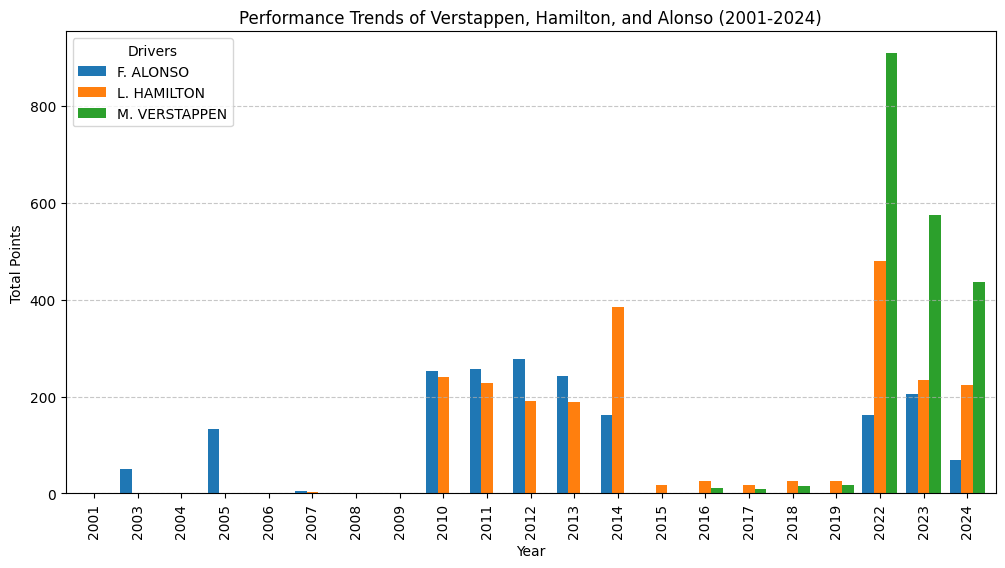

In [37]:
# Recreate the driver trends pivot table
driver_trends_summary = df[df["Drivers"].isin(["M. VERSTAPPEN", "L. HAMILTON", "F. ALONSO"])].groupby(
    ["Year", "Drivers"]).agg(Total_Points=("Total Points", "sum")).reset_index()

# Pivot the data for bar chart visualization
driver_trends_pivot = driver_trends_summary.pivot(index="Year", columns="Drivers", values="Total_Points")

# Plot the bar chart
plt.figure(figsize=(12, 6))
driver_trends_pivot.plot(kind="bar", figsize=(12, 6), width=0.8)

# Graph customization
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.title("Performance Trends of Verstappen, Hamilton, and Alonso (2001-2024)")
plt.legend(title="Drivers")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


--> Max Verstappen: Rapid rise in performance after 2019, peaking in 2022, and still maintaining dominance.

--> Lewis Hamilton: Strong from 2014-2021, but visible decline in 2023-2024.

--> Fernando Alonso: Competitive in the early 2000s, decline post-2014, recent resurgence but lower in 2024.

In [38]:
# Filter data for M. VERSTAPPEN from 2022 to 2024
verstappen_data = df[(df["Drivers"] == "M. VERSTAPPEN") & (df["Year"].between(2022, 2024))]

# Select relevant columns (excluding "Drivers_ID" and "Total Points")
verstappen_performance = verstappen_data.drop(columns=["Drivers_ID", "Total Points"], errors='ignore')

# Melt the data to have a long format: Year, Country, Points
verstappen_long = verstappen_performance.melt(id_vars=["Drivers", "Year"], var_name="Country", value_name="Points")

# Remove zero-point races
verstappen_long = verstappen_long[verstappen_long["Points"] > 0]

# Display the structured performance data
verstappen_long.sort_values(by=["Year", "Country"])


,Drivers,Year,Country,Points
120,M. VERSTAPPEN,2022,Abu_Dhabi,25.0
123,M. VERSTAPPEN,2022,Abu_Dhabi,25.0
48,M. VERSTAPPEN,2022,Austria,27.0
51,M. VERSTAPPEN,2022,Austria,27.0
44,M. VERSTAPPEN,2022,Azerbaijan,25.0
...,...,...,...,...
130,M. VERSTAPPEN,2024,Saudi_Arabia,25.0
86,M. VERSTAPPEN,2024,Singapore,18.0
26,M. VERSTAPPEN,2024,Spain,25.0
134,M. VERSTAPPEN,2024,USA,23.0


In [39]:
# Aggregate total points per country
verstappen_best_performance = verstappen_long.groupby("Country")["Points"].sum().reset_index()

# Sort by total points in descending order
verstappen_best_performance = verstappen_best_performance.sort_values(by="Points", ascending=False)

# Display top-performing countries
verstappen_best_performance.head(10)  # Top 10 best-performing countries


,Country,Points
2,Austria,106.0
25,USA,106.0
18,Miami,104.0
15,Japan,102.0
24,Spain,101.0
8,Canada,100.0
5,Belgium,97.0
20,Netherlands,95.0
22,Saudi_Arabia,94.0
11,Emilia_Romagna,93.0
